In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/loan_data_2.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
print(df.shape)
print(df['purpose'].value_counts())
print(df['credit.policy'].value_counts())

(9578, 14)
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64
1    7710
0    1868
Name: credit.policy, dtype: int64


In [5]:
from sklearn.preprocessing import OrdinalEncoder
encode=OrdinalEncoder()

In [6]:
df['purpose']=encode.fit_transform(df[['purpose']])


In [7]:
list([df['purpose'].unique(),['debt_consolidation','all_other','credit_card','home_improvement','small_business','major_purchase','educational']])

[array([2., 1., 0., 4., 6., 5., 3.]),
 ['debt_consolidation',
  'all_other',
  'credit_card',
  'home_improvement',
  'small_business',
  'major_purchase',
  'educational']]

In [8]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2.0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1.0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2.0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2.0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1.0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
import matplotlib.pyplot as plt

2.0    3223
0.0    1835
1.0    1020
4.0     512
6.0     495
5.0     371
3.0     254
Name: purpose, dtype: int64
[2. 1. 0. 4. 6. 5. 3.]


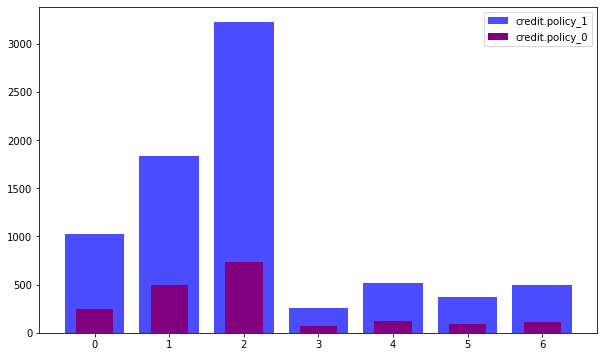

In [10]:
plt.figure(figsize=(10,6))
a=plt.bar(x=df['purpose'].unique(),height=df.loc[df['credit.policy']==1]['purpose'].value_counts(),label='credit.policy_1',color='blue',alpha=0.7)
b=plt.bar(x=df['purpose'].unique(),height=df.loc[df['credit.policy']==0]['purpose'].value_counts(),width=0.5,label='credit.policy_0',color='purple',alpha=1)
plt.legend()

print(df.loc[df['credit.policy']==1]['purpose'].value_counts())
print(df['purpose'].unique())
#The blue portion of height of graph indicates the paid once and orange portion of height of graph indicates unpaid onces

In [11]:
#The avarage rate of interest 
print(df['int.rate'].mean())

0.12264006055543834


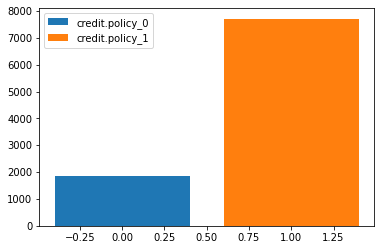

In [12]:
plt.bar(x=0,height=df.loc[df['credit.policy']==0]['installment'].count(),label='credit.policy_0')
plt.bar(x=1,height=df.loc[df['credit.policy']==1]['installment'].count(),label='credit.policy_1')
plt.legend()
# This bar incicates the installment amount of all the paid onces are added and installments of all all unpaid are added

In [13]:
df['log.annual.inc'].mean()

10.932117137800155

In [14]:
a=(df['dti'].max())
b=df['dti'].min()
a-b

29.96

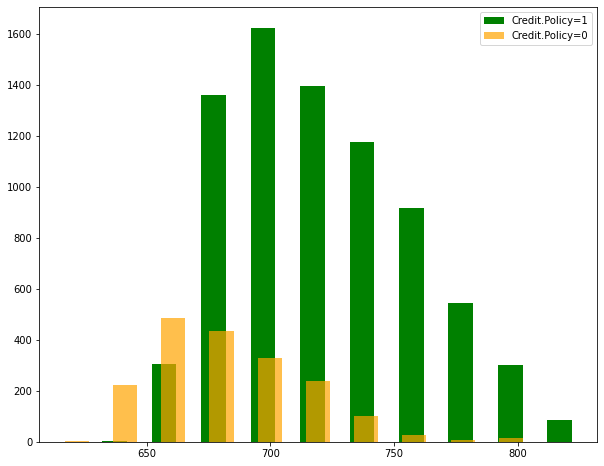

In [15]:
plt.figure(figsize=(10,8))
f_1=plt.hist(df.loc[df['credit.policy']==1]['fico'],rwidth=0.5,color='green',label='Credit.Policy=1')
f_0=plt.hist(df.loc[df['credit.policy']==0]['fico'],rwidth=0.5,color='orange',label='Credit.Policy=0',alpha=0.7)
plt.legend()

#There are 2363 people are not fully paid out of 7710 people

In [16]:
half_paid=0
for i in range(0,9578):
  if df['credit.policy'][i]==df['not.fully.paid'][i]:
    half_paid=half_paid+1
print(half_paid)
print(df['credit.policy'].value_counts())

2363
1    7710
0    1868
Name: credit.policy, dtype: int64


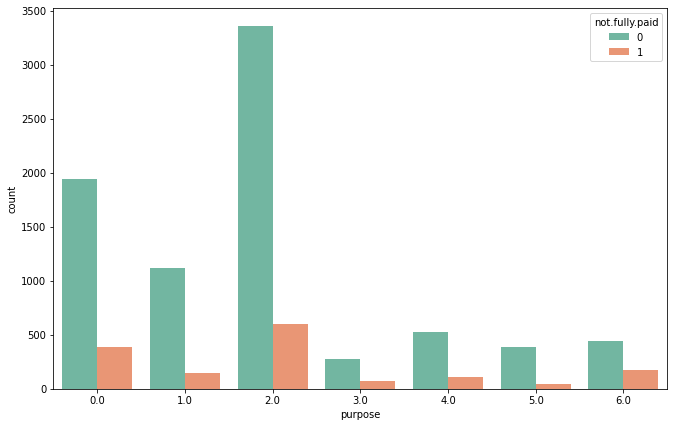

In [17]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette="Set2")

In [18]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2.0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1.0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2.0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2.0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1.0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [19]:
corr_df=df.corr().abs()


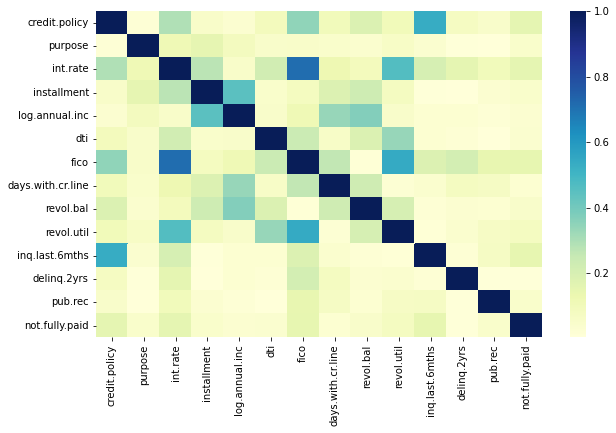

In [20]:

plt.figure(figsize=(10,6))
sns.heatmap(corr_df,cmap="YlGnBu")

In [21]:
des=df.describe().transpose
des

<bound method DataFrame.transpose of        credit.policy      purpose  ...      pub.rec  not.fully.paid
count    9578.000000  9578.000000  ...  9578.000000     9578.000000
mean        0.804970     1.944038  ...     0.062122        0.160054
std         0.396245     1.686881  ...     0.262126        0.366676
min         0.000000     0.000000  ...     0.000000        0.000000
25%         1.000000     1.000000  ...     0.000000        0.000000
50%         1.000000     2.000000  ...     0.000000        0.000000
75%         1.000000     2.000000  ...     0.000000        0.000000
max         1.000000     6.000000  ...     5.000000        1.000000

[8 rows x 14 columns]>

In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Convolution2D,pooling,Flatten,Dense
from sklearn.preprocessing import minmax_scale
from sklearn import metrics

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x=df.drop('credit.policy',axis=1)
y=df['credit.policy']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=100)

In [26]:

minmax_scale(x_train,copy='True')
minmax_scale(x_test,copy='True')

array([[0.33333333, 0.34143223, 0.23751026, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.3286445 , 0.34587667, ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.49808184, 0.32219438, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.29539642, 0.27097146, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.1112532 , 0.06870745, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.50703325, 0.29354503, ..., 0.        , 0.        ,
        0.        ]])

In [27]:
#Model building of ANN


model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=(['accuracy']))


In [28]:
#Training the Model

model.fit(x_train,y_train,epochs=1000,batch_size=100,verbose=0)

In [29]:

loss_in_train,accuracy_in_train=model.evaluate(x_train,y_train,verbose=0)
print(f'loss_in_train={loss_in_train*100}\naccuracy_in_train={accuracy_in_train*100}')

loss_in_train=22.491374611854553
accuracy_in_train=91.70263409614563


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                266       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 527
Trainable params: 527
Non-trainable params: 0
_________________________________________________________________


In [31]:
#Predicting the test data
y_test_predict=model.predict(x_test)
y_test_predict

array([[0.9796415 ],
       [0.96712255],
       [0.98124695],
       ...,
       [0.9561553 ],
       [0.98099774],
       [0.7859198 ]], dtype=float32)

In [32]:
len(y_test_predict)

2395

In [33]:
y_test_pred=[]
for i in range(0,2395):
  if y_test_predict[i]<0.5:
    y_test_pred.append(0)
  else:
    y_test_pred.append(1)


In [34]:
loss_in_test,accuracy_in_test=model.evaluate(x_test,y_test,verbose=0)
print(f'loss_in_test={loss_in_test*100}\naccuracy_in_test={accuracy_in_test*100}')

loss_in_test=27.333256602287292
accuracy_in_test=89.60334062576294


In [35]:
conf_matrix=metrics.confusion_matrix(y_test,y_test_pred)
conf_matrix

array([[ 298,  189],
       [  60, 1848]])

In [36]:
report=metrics.classification_report(y_test,y_test_pred)

In [37]:
print(report)

              precision    recall  f1-score   support

           0       0.83      0.61      0.71       487
           1       0.91      0.97      0.94      1908

    accuracy                           0.90      2395
   macro avg       0.87      0.79      0.82      2395
weighted avg       0.89      0.90      0.89      2395

